You can find the data information from [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) and more detailed from [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt). The data contains 23 nominal, 23 ordinal, 14 discrete, 20 continuous variables and one target variable. 

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train.shape

(1460, 81)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [20]:
# check sold price

print(np.min(train.SalePrice))
print(np.mean(train.SalePrice))
print(np.max(train.SalePrice))

34900
180921.19589
755000


In [53]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
4 / 3

1

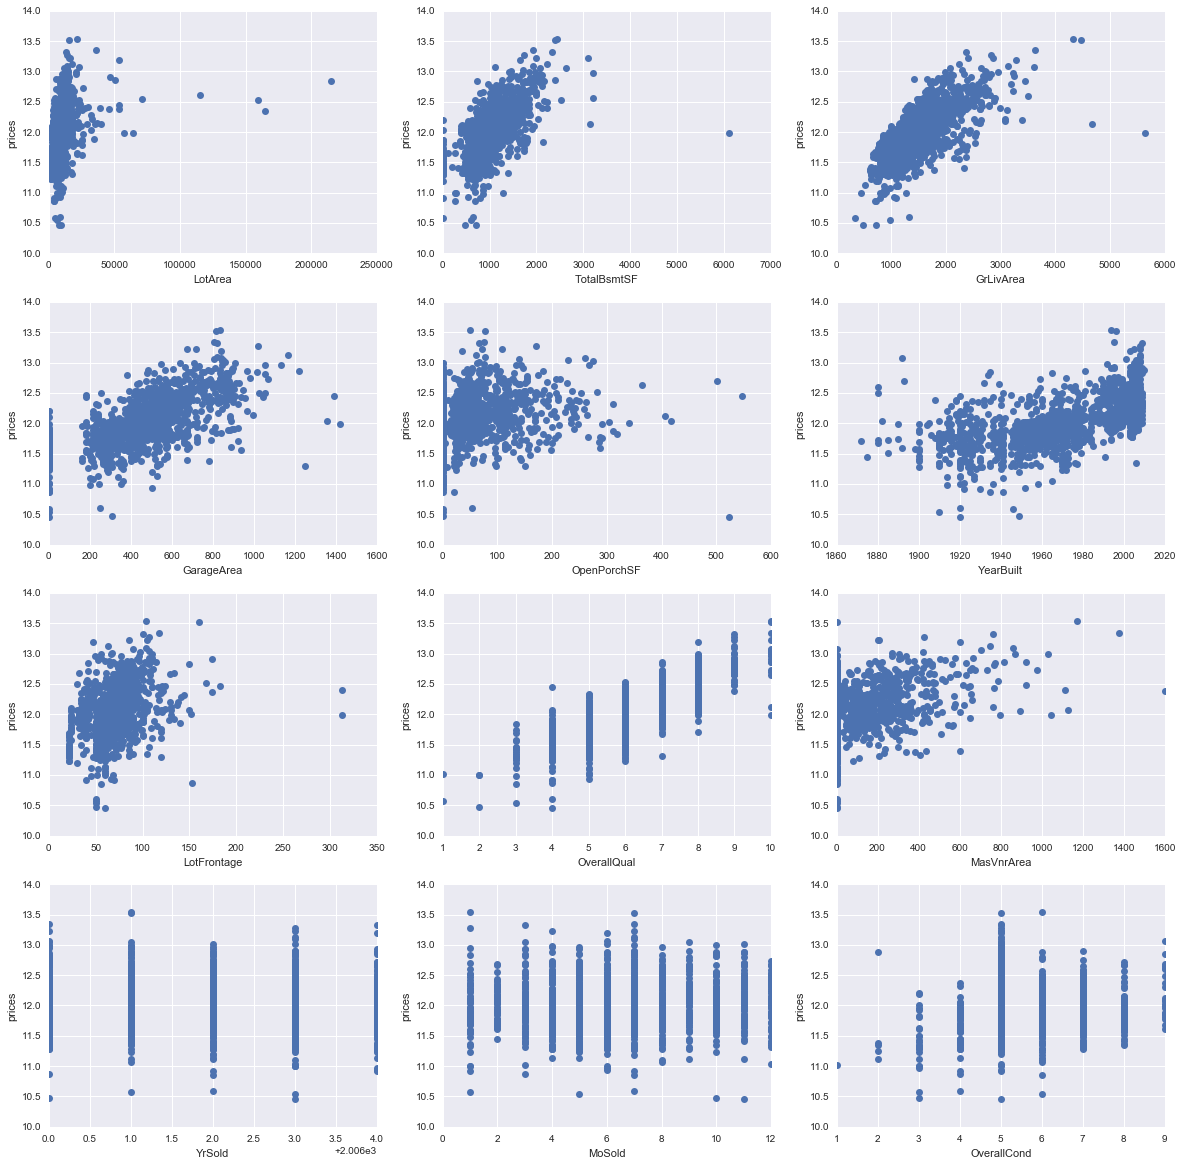

In [55]:
fig = plt.figure(figsize=(20, 20))

cols= ['LotArea','TotalBsmtSF', 'GrLivArea', 'GarageArea' ,'OpenPorchSF', 'YearBuilt'
       ,'LotFrontage', 'OverallQual', 'MasVnrArea','YrSold','MoSold' ,'OverallCond']
for i, col in enumerate(cols):
    
    plt.subplot(4, 3, i + 1)  

    plt.plot(train[col], np.log(train.SalePrice), 'o')
    plt.xlabel(col)
    plt.ylabel('prices')

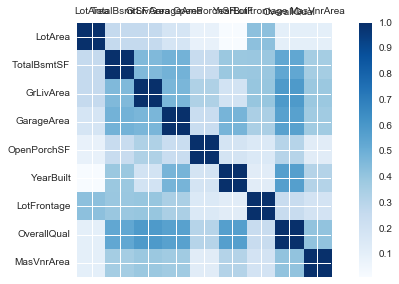

In [30]:
def plot_correlation(df, fg_width, fg_height):
    
    corr = df.corr()
    fig = plt.figure(figsize=(fg_width, fg_height))
    ax = fig.add_subplot(211)
    cax = ax.matshow(corr,cmap='Blues', interpolation='nearest')
    
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_correlation(train[['LotArea','TotalBsmtSF', 'GrLivArea', 'GarageArea' ,'OpenPorchSF', 'YearBuilt'
       ,'LotFrontage', 'OverallQual', 'MasVnrArea']], 10,10)

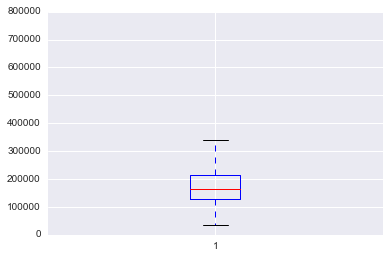

In [47]:
plt.boxplot(train.SalePrice,showfliers=True)
plt.show()

(array([  22.,  126.,  380.,  343.,  229.,  144.,   86.,   49.,   28.,
          23.,   12.,    7.,    3.,    1.,    2.,    1.,    2.,    0.,
           0.,    2.]),
 array([  34900.,   70905.,  106910.,  142915.,  178920.,  214925.,
         250930.,  286935.,  322940.,  358945.,  394950.,  430955.,
         466960.,  502965.,  538970.,  574975.,  610980.,  646985.,
         682990.,  718995.,  755000.]),
 <a list of 20 Patch objects>)

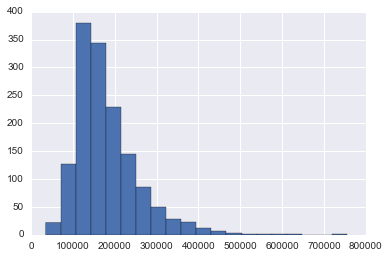

In [31]:
plt.hist(train.SalePrice, bins=20)

In [49]:
from collections import Counter

for col, col_data in train.iteritems():
    if col_data.dtype == object:
        cnt = Counter(col_data)
        print col + ':' , cnt
print '\n' 
print 'Numerical variables with missing values:'
for col, col_data in train.iteritems():
    if col_data.dtype != object and any(col_data.isnull()):

        print col + ':' , any(col_data.isnull())

MSZoning: Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
Street: Counter({'Pave': 1454, 'Grvl': 6})
Alley: Counter({nan: 1369, 'Grvl': 50, 'Pave': 41})
LotShape: Counter({'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10})
LandContour: Counter({'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36})
Utilities: Counter({'AllPub': 1459, 'NoSeWa': 1})
LotConfig: Counter({'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4})
LandSlope: Counter({'Gtl': 1382, 'Mod': 65, 'Sev': 13})
Neighborhood: Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'SWISU': 25, 'StoneBr': 25, 'Blmngtn': 17, 'MeadowV': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2})
Condition1: Counter({'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 

In [50]:
train.PoolArea

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, dtype: int64